## Tutorial on sampling in a custom design space
_v1.0_

First we import the desired libraries:

In [1]:
from f3dasm.src.designofexperiments import DoE
from f3dasm.src.space import ContinuousSpace, DiscreteSpace, CategoricalSpace
from f3dasm.sampling.latinhypercube import LatinHypercube
from f3dasm.sampling.randomuniform import RandomUniform
from f3dasm.sampling.sobolsequence import SobolSequencing
from f3dasm.src.data import Data

### Constructing the design space

There are three types of parameters that can be created: continous, discrete and categorical:

* We can create **continous** parameters with a `lower_bound` and `upper_bound` with the `ContinuousSpace` class

In [2]:
x1 = ContinuousSpace('x1', lower_bound=0.0, upper_bound=100.0)
x2 = ContinuousSpace('x2', lower_bound=0.0, upper_bound=4.0)

* We can create **discrete** parameters with a `lower_bound` and `upper_bound` with the `DiscreteSpace` class

In [3]:
x3 = DiscreteSpace('x3', lower_bound=2, upper_bound=4)
x4 = DiscreteSpace('x4', lower_bound=74, upper_bound=99)

* We can create **categorical** parameters with a list of strings (`categories`) with the `CategoricalSpace` class

In [4]:
x5 = CategoricalSpace('x5', categories=['test1','test2','test3','test4'])
x6 = CategoricalSpace('x6', categories=['material1','material2','material3'])

The design space is then constructed by calling the `DoE` class:

In [5]:
design = DoE(input_space=[x1, x2, x3, x4, x5, x6])

### Sampling from the design space

Three samplers are included in this module:
* Latin Hypercube sampling (`LatinHyperCube`)
* Random uniform sampling (`RandomUniform`)
* Sobol sequence sampling (`SobolSequencing`)

We have to feed them the designspace:

In [6]:
lhs = LatinHypercube(doe=design)
ran = RandomUniform(doe=design)
sob = SobolSequencing(doe=design)

We can evoke sampling by calling the `get_samples()` method and providing the number of samples:

In [7]:
N = 100 # Number of samples

samples_lhs = lhs.get_samples(N)
samples_ran = ran.get_samples(N)
samples_sob = sob.get_samples(N)

samples_lhs

input                                   
           x1        x2 x3  x4     x5         x6
0   53.084638  3.543088  4  91  test4  material3
1   71.404049  3.847510  3  81  test4  material3
2   67.129385  0.758526  4  94  test1  material3
3   48.380450  3.776365  4  92  test3  material3
4   42.822362  1.992024  4  99  test4  material2
..        ...       ... ..  ..    ...        ...
95  73.679082  3.425792  4  79  test2  material1
96  77.323518  3.031450  4  93  test1  material1
97  25.508539  1.236838  2  85  test3  material1
98  86.246927  2.437651  3  98  test1  material2
99  21.365357  1.333967  2  94  test3  material2

[100 rows x 6 columns]

#### Storing and displaying sampling in the `Data` structure

Samples can be stored as data within the `Data` class:

In [8]:
data_lhs = Data(samples_lhs)
data_ran = Data(samples_ran)
data_sob = Data(samples_sob)

Currently, only a 2D plotting function is implemented (`plot()`).
This function requires the two parameter names: 

/home/martin/Documents/GitHub/testthings/f3dasm/src/data.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


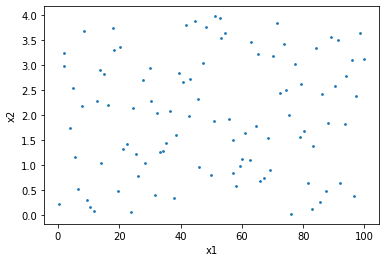

In [9]:
data_lhs.plot(input_par1='x1',input_par2='x2')

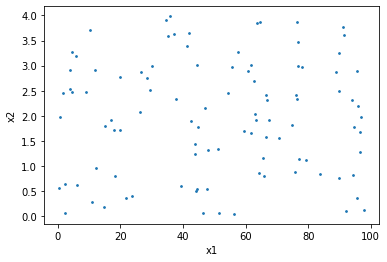

In [10]:
data_ran.plot(input_par1='x1',input_par2='x2')

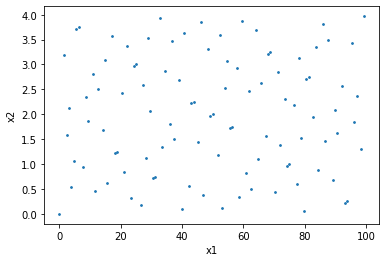

In [11]:
data_sob.plot(input_par1='x1',input_par2='x2')

Categorical or discrete parameters can also be plotted:

/home/martin/Documents/GitHub/testthings/f3dasm/src/data.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


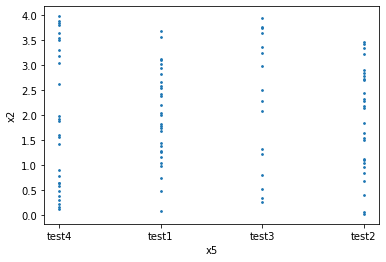

In [12]:
data_lhs.plot(input_par1='x5',input_par2='x2')

In [48]:
x = data_lhs.data[[('input','x1'),('input','x2')]]
x.dtypes

input  x1    float64
       x2    float64
dtype: object

In [32]:
import numpy as np
def f(x):
    return np.sin(x)*x


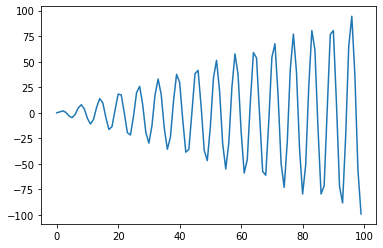

In [47]:
y = f(x.to_numpy().T.ravel())
y
import matplotlib.pyplot as plt
plt.plot(f(range(100)))

In [ ]:
x